## Part 1: Training a convolutional neural network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

print("-----------")

data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)


validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)




2023-03-01 13:19:55.194715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 13:19:55.299140: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-01 13:19:55.301634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-01 13:19:55.301643: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

-----------
Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [35]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping


def make_convnet(train_gen,validation_gen):
    num_classes = 2
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1),
                    activation="relu",
                    input_shape=(64,64,3)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes - 1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


    history = model.fit(train_generator,
            batch_size=256,
            epochs=10,
            verbose=1,
            validation_data=validation_generator,
            callbacks=[es]);
    return history


In [36]:
history = make_convnet(train_gen=train_generator, validation_gen=validation_generator)


Epoch 1/10
50/50 [==============================] - 9s 177ms/step - loss: 0.7018 - accuracy: 0.5575 - val_loss: 0.6699 - val_accuracy: 0.6111
Epoch 2/10
50/50 [==============================] - 9s 189ms/step - loss: 0.6222 - accuracy: 0.6606 - val_loss: 0.5830 - val_accuracy: 0.6910
Epoch 3/10
50/50 [==============================] - 13s 268ms/step - loss: 0.5651 - accuracy: 0.7169 - val_loss: 0.6382 - val_accuracy: 0.6372
Epoch 4/10
50/50 [==============================] - 21s 421ms/step - loss: 0.5487 - accuracy: 0.7362 - val_loss: 0.5733 - val_accuracy: 0.7188
Epoch 5/10
50/50 [==============================] - 19s 379ms/step - loss: 0.4948 - accuracy: 0.7569 - val_loss: 0.5288 - val_accuracy: 0.7396
Epoch 6/10
50/50 [==============================] - 18s 367ms/step - loss: 0.4676 - accuracy: 0.7881 - val_loss: 0.5388 - val_accuracy: 0.7326
Epoch 7/10
50/50 [==============================] - 19s 384ms/step - loss: 0.4197 - accuracy: 0.8112 - val_loss: 0.5227 - val_accuracy: 0.7552
E

### Plot Accuracy

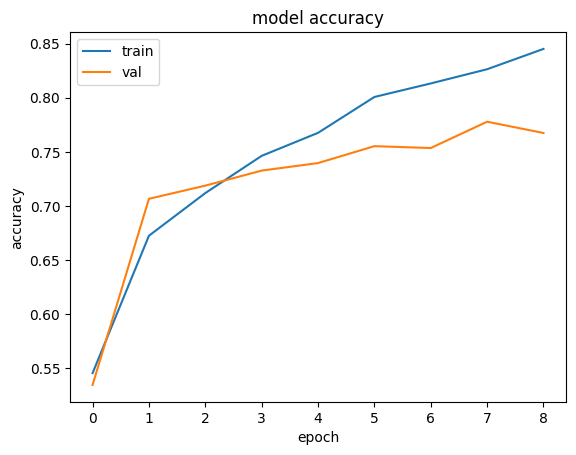

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

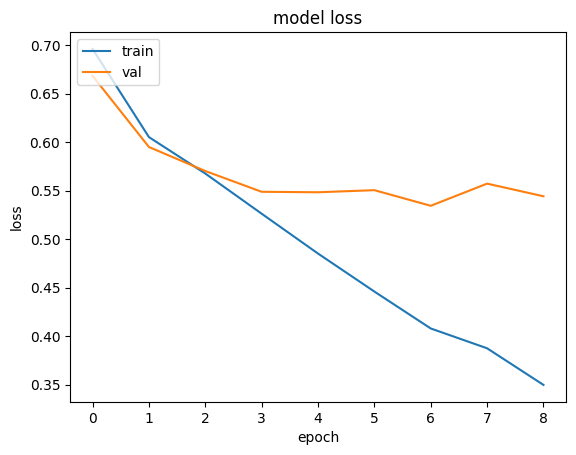

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 2: Data Augmentation

In [43]:
data_gen_aug = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,

                                  brightness_range=[0.7,1.3],
                                  zoom_range=[0.8,1.2]
                                  )

train_generator_aug = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

history_aug = make_convnet(train_gen=train_generator_aug, validation_gen=validation_generator)


Found 1600 images belonging to 2 classes.
Epoch 1/10
50/50 [==============================] - 9s 172ms/step - loss: 0.6612 - accuracy: 0.6150 - val_loss: 0.6540 - val_accuracy: 0.6007
Epoch 2/10
50/50 [==============================] - 9s 184ms/step - loss: 0.5749 - accuracy: 0.7106 - val_loss: 0.5623 - val_accuracy: 0.7396
Epoch 3/10
50/50 [==============================] - 10s 199ms/step - loss: 0.5246 - accuracy: 0.7525 - val_loss: 0.5637 - val_accuracy: 0.7448
Epoch 4/10
50/50 [==============================] - 21s 418ms/step - loss: 0.4913 - accuracy: 0.7719 - val_loss: 0.5252 - val_accuracy: 0.7396
Epoch 5/10
50/50 [==============================] - 20s 391ms/step - loss: 0.4789 - accuracy: 0.7912 - val_loss: 0.5610 - val_accuracy: 0.7483
Epoch 6/10
50/50 [==============================] - 19s 388ms/step - loss: 0.4455 - accuracy: 0.7981 - val_loss: 0.5477 - val_accuracy: 0.7622
Epoch 6: early stopping


### Plot Accuracy

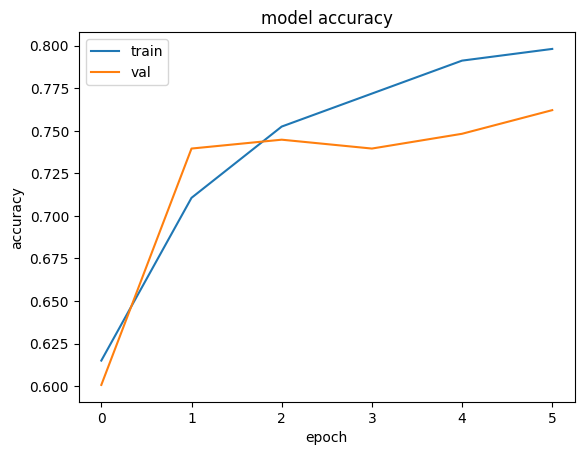

In [44]:
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot Loss

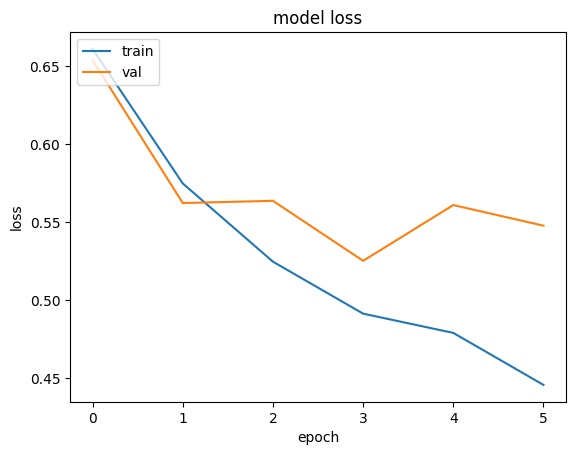

In [45]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Interlude: Applying a pre-trained convolutional neural network